In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#read the data
data = pd.read_csv("student-mat.csv", sep=';')
#data = (data - data.mean())/data.std()

my_data = pd.get_dummies(data,drop_first=True)

#we need to normalize the features using mean normalization

my_data.iloc[:,:16] = (my_data.iloc[:,:16] - my_data.iloc[:,:16].mean())/my_data.iloc[:,:16].std()
my_data.head()
#my_data.columns


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.021751,1.142407,1.358648,0.791247,-0.042232,-0.449374,0.062115,-0.235711,0.800464,-0.540014,...,1,0,1,0,0,0,1,1,0,0
1,0.238078,-1.597982,-1.398197,-0.642435,-0.042232,-0.449374,1.177367,-0.235711,-0.097784,-0.540014,...,0,0,0,1,0,0,0,1,1,0
2,-1.329268,-1.597982,-1.398197,-0.642435,-0.042232,3.584777,0.062115,-0.235711,-0.996032,0.582646,...,1,0,1,0,1,0,1,1,1,0
3,-1.329268,1.142407,-0.479249,-0.642435,1.149321,-0.449374,-1.053136,-1.236851,-0.996032,-0.540014,...,1,0,0,1,1,1,1,1,1,1
4,-0.545595,0.228944,0.439699,-0.642435,-0.042232,-0.449374,0.062115,-0.235711,-0.996032,-0.540014,...,0,0,0,1,1,0,1,1,0,0


In [2]:
#setting the matrixes

X = my_data.copy()
X.drop(['G1','G2','G3'], axis=1, inplace=True)
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

#y = my_data.iloc[:,].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
#y = my_data.iloc[:,15:16].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray

y= my_data['G3'].values.reshape(395,1)
theta = np.zeros([1,40])

X_train, X_test, y_train, y_test = train_test_split(X, y)
theta = np.zeros([1,X_train.shape[1]])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(theta.shape)

#set hyper parameters
alpha = 0.1
iters = 25000



(296, 40)
(296, 1)
(99, 40)
(99, 1)
(1, 40)


[[-0.653045   -0.10792386  0.1231603   0.01416905 -0.0391135   0.0883431
  -0.32568676  0.01515976  0.09306239 -0.107125   -0.04013189  0.04293635
  -0.02741093  0.09367173  0.32590724  0.2798869   0.07274088  0.19555238
  -0.04912306  0.24300438 -0.05910169  0.14383439 -0.12574962  0.14201434
   0.13895679  0.07314843  0.39146623 -0.06128797  0.1618334   0.21142765
  -0.06165756  0.12971532 -0.0903549  -0.25028568  0.09964404 -0.11715538
   0.03260515  0.25765315  0.31779579 -0.27079414]]
0.34934147355379697
(1, 40)


Text(0.5,1,'Error vs. Training Epoch')

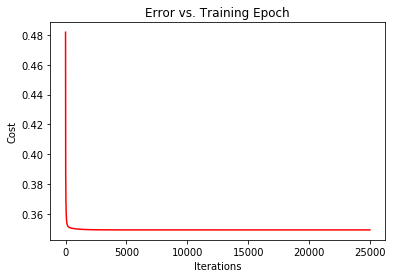

In [3]:
#computecost
def computeCost(X_train,y_train,theta):
    tobesummed = np.power(((X_train @ theta.T)-y_train),2)
    return np.sum(tobesummed)/(2 * len(X_train))

#gradient descent
def gradientDescent(X_train,y_train,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X_train)) * np.sum(X_train * (X_train @ theta.T - y_train), axis=0)
        cost[i] = computeCost(X_train, y_train, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X_train,y_train,theta,iters,alpha)
print(g)

finalCost = computeCost(X_train,y_train,g)
print(finalCost)

print(g.shape)
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [4]:
g.shape
thetas = g.reshape(40,1)

In [5]:

y_test_prediction =  X_test.dot(thetas)  

print("theta",g.shape)
print("y_test",y_test.shape)
print("X_test",X_test.shape)
print("y_test_pred",y_test_prediction.shape)

# print(mean_squared_error(y_test, y_test_prediction))

import sklearn.metrics as metrics

print('MAE test all variables:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('MSE test all variables:', metrics.mean_squared_error(y_test, y_test_prediction))
print('RMSE test all variables:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))

from sklearn.metrics import r2_score
print("R-Squared: ",r2_score(y_test,y_test_prediction))



theta (1, 40)
y_test (99, 1)
X_test (99, 40)
y_test_pred (99, 1)
MAE test all variables: 0.7416780776983712
MSE test all variables: 0.9288272626758797
RMSE test all variables: 0.9637568483159431
R-Squared:  -0.03393628764069989


C:\Users\vkm170130\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


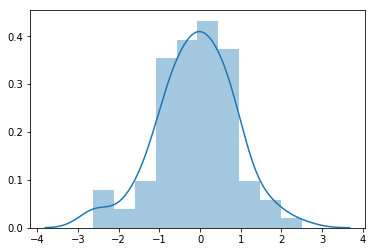

In [6]:
import seaborn as sns
sns.distplot(y_test - y_test_prediction)

In [7]:
y_train_prediction =  X_train.dot(thetas)  

print("theta",g.shape)
print("y_test",y_train.shape)
print("X_test",X_train.shape)
print("y_test_pred",y_train_prediction.shape)

# print(mean_squared_error(y_test, y_test_prediction))

import sklearn.metrics as metrics

print('MAE train all:', metrics.mean_absolute_error(y_train, y_train_prediction))
print('MSE train all:', metrics.mean_squared_error(y_train, y_train_prediction))
print('RMSE train all:', np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction)))

from sklearn.metrics import r2_score
print("R-Squared: ",r2_score(y_train,y_train_prediction))

theta (1, 40)
y_test (296, 1)
X_test (296, 40)
y_test_pred (296, 1)
MAE train all: 0.6502311092409062
MSE train all: 0.6986829471075939
RMSE train all: 0.835872566308761
R-Squared:  0.321314112521473


Columns names:  Index(['age', 'Medu', 'Fedu', 'traveltime', 'failures', 'goout', 'address_U',
       'Mjob_health', 'paid_yes', 'higher_yes'],
      dtype='object')
(296, 11)
(296, 1)
(99, 11)
(99, 1)
(1, 11)
[[-0.05962106 -0.05324772  0.12310638 -0.0577503  -0.07070131 -0.27699228
  -0.09772291  0.02550197  0.08514246  0.04988162  0.00998286]]
final cost:  0.40636617279309045
(1, 11)


Text(0.5,1,'Error vs. Training Epoch')

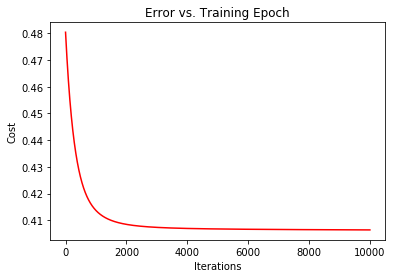

In [8]:

#read the data
data = pd.read_csv("student-mat.csv", sep=';')
my_data = pd.get_dummies(data,drop_first=True)

#we need to normalize the features using mean normalization
my_data.iloc[:,:16] = (my_data.iloc[:,:16] - my_data.iloc[:,:16].mean())/my_data.iloc[:,:16].std()


X = my_data.copy()
X.drop(['famrel', 'freetime', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'sex_M', 'famsize_LE3', 'Pstatus_T', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes',
       'activities_yes', 'nursery_yes', 'internet_yes', 'G1', 'G2', 'G3', 'studytime','romantic_yes'], axis=1, inplace=True)
print("Columns names: ", X.columns)
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

#y = my_data.iloc[:,].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
#y = my_data.iloc[:,15:16].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray

y= my_data['G3'].values.reshape(395,1)
theta = np.zeros([1,40])

X_train, X_test, y_train, y_test = train_test_split(X, y)
theta = np.zeros([1,X_train.shape[1]])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(theta.shape)

#set hyper parameters
alpha = 0.001
iters = 10000


#running the gd and cost function
g,cost = gradientDescent(X_train,y_train,theta,iters,alpha)
print(g)

finalCost = computeCost(X_train,y_train,g)
print("final cost: ",finalCost)

print(g.shape)
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [9]:
g.shape
thetas = g.reshape(11,1)
y_test_prediction =  X_test.dot(thetas)  
y_train_prediction =  X_train.dot(thetas)  


print("theta",g.shape)
print("y_test",y_test.shape)
print("X_test",X_test.shape)
print("y_test_pred",y_test_prediction.shape)

# print(mean_squared_error(y_test, y_test_prediction))

import sklearn.metrics as metrics

print('MAE test 10 best:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('MSE test 10 best:', metrics.mean_squared_error(y_test, y_test_prediction))
print('RMSE test 10 best:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))

from sklearn.metrics import r2_score
print("R-Squared: ",r2_score(y_test,y_test_prediction))

print('MAE train 10 best:', metrics.mean_absolute_error(y_train, y_train_prediction))
print('MSE train 10 best:', metrics.mean_squared_error(y_train, y_train_prediction))
print('RMSE train 10 best:', np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction)))

from sklearn.metrics import r2_score
print("R-Squared: ",r2_score(y_train,y_train_prediction))




theta (1, 11)
y_test (99, 1)
X_test (99, 11)
y_test_pred (99, 1)
MAE test 10 best: 0.7191590774874648
MSE test 10 best: 0.8866642395161524
RMSE test 10 best: 0.9416285039845345
R-Squared:  0.19779448802639732
MAE train 10 best: 0.6818398878822665
MSE train 10 best: 0.8127323455861809
RMSE train 10 best: 0.9015166917956544
R-Squared:  0.15452529503570123


Index(['guardian_other', 'reason_other', 'nursery_yes', 'romantic_yes',
       'reason_reputation', 'guardian_mother', 'famsup_yes', 'schoolsup_yes',
       'famsize_LE3', 'Walc'],
      dtype='object')
(296, 11)
(296, 1)
(99, 11)
(99, 1)
(1, 11)
[[ 0.03088058 -0.04470958  0.05814232 -0.00107945 -0.20098604  0.07175922
  -0.01781166 -0.01652476 -0.10494309  0.07196759 -0.09128033]]
0.43895241159495146
(1, 11)
theta (1, 11)
y_test (99, 1)
X_test (99, 11)
y_test_pred (99, 1)
MAE test 10 random: 0.7993768675164847
MSE test 10 random: 1.150764026398382
RMSE test 10 random: 1.072736699474005
R-Squared -0.013313228886721484


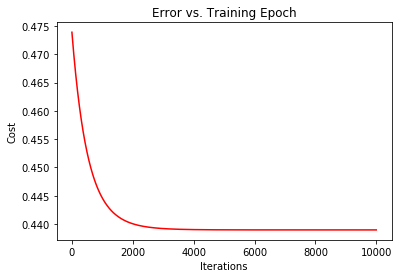

In [10]:
#read the data
#data = pd.read_csv("student-mat.csv", sep=';')
#my_data = pd.get_dummies(data,drop_first=True)


data = pd.read_csv("student-mat.csv", sep=';')
#data = (data - data.mean())/data.std()

#my_data = pd.get_dummies(data,drop_first=True)

#we need to normalize the features using mean normalization
my_data = pd.get_dummies(data,drop_first=True)

my_data.iloc[:,:16] = (my_data.iloc[:,:16] - my_data.iloc[:,:16].mean())/my_data.iloc[:,:16].std()
my_data.head()

#we need to normalize the features using mean normalization
my_data = (my_data - my_data.mean())/my_data.std()


A = my_data.copy()
y= my_data['G3'].values.reshape(395,1)
A.drop(['G1','G2','G3'], axis=1, inplace=True)
X = A[A.columns.to_series().sample(10)]
print(X.columns)

ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)


#y = my_data.iloc[:,].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
#y = my_data.iloc[:,15:16].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray


X_train, X_test, y_train, y_test = train_test_split(X, y)
theta = np.zeros([1,X_train.shape[1]])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(theta.shape)

#set hyper parameters
alpha = 0.001
iters = 10000


#running the gd and cost function
g,cost = gradientDescent(X_train,y_train,theta,iters,alpha)
print(g)

finalCost = computeCost(X_train,y_train,g)
print(finalCost)

print(g.shape)
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

g.shape
thetas = g.reshape(11,1)
y_test_prediction =  X_test.dot(thetas)  
y_train_prediction = X_train.dot(thetas)

print("theta",g.shape)
print("y_test",y_test.shape)
print("X_test",X_test.shape)
print("y_test_pred",y_test_prediction.shape)

# print(mean_squared_error(y_test, y_test_prediction))

import sklearn.metrics as metrics

print('MAE test 10 random:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('MSE test 10 random:', metrics.mean_squared_error(y_test, y_test_prediction))
print('RMSE test 10 random:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))

from sklearn.metrics import r2_score
print("R-Squared",r2_score(y_test,y_test_prediction))


In [12]:
import sklearn.metrics as metrics

print('MAE train 10 random:', metrics.mean_absolute_error(y_train, y_train_prediction))
print('MSE train 10 random:', metrics.mean_squared_error(y_train, y_train_prediction))
print('RMSE train 10 random:', np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction)))

from sklearn.metrics import r2_score
print("R-Squared",r2_score(y_train,y_train_prediction))

MAE train 10 random: 0.7093916370083019
MSE train 10 random: 0.8779048231899029
RMSE train 10 random: 0.93696575347763
R-Squared 0.07280573332549534


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split  
%matplotlib inline

In [14]:
data = pd.read_csv("student-mat.csv", sep=';')
data = pd.get_dummies(data,drop_first=True)

data['result'] = 'na'
data.loc[(data.G3 > 8), 'result'] = 1 
data.loc[(data.G3 <= 8), 'result'] = 0 

In [15]:
data['result'].value_counts()

1    293
0    102
Name: result, dtype: int64

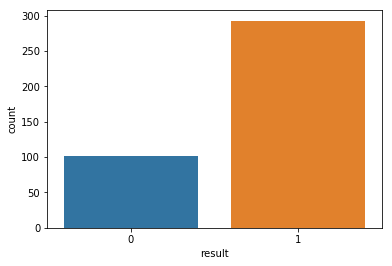

In [16]:
sns.countplot(x='result',data=data)

In [17]:
X = data.drop(['result','G1','G2','G3'], axis=1)
y = data['result']
X=np.array(X[::])
y=np.array(y[::])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
class LogisticRegression:
    def __init__(self, alpha=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = alpha
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose=verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [19]:
model = LogisticRegression(alpha=0.01, num_iter=300000,verbose=True)
%time model.fit(X_train, y_train)

y_test_predictions = model.predict(X_test,threshold=0.5)
y_train_predictions = model.predict(X_train,threshold=0.5)


loss: 0.5687856033314344 	
loss: 0.44603184052115136 	
loss: 0.443742476039583 	
loss: 0.4431129350102441 	
loss: 0.4428489155712979 	
loss: 0.44270106191712816 	
loss: 0.442599368884514 	
loss: 0.44252016396409405 	
loss: 0.44245417911518736 	
loss: 0.442397161549872 	
loss: 0.4423468087252527 	
loss: 0.4423016855142292 	
loss: 0.44226080548209146 	
loss: 0.44222344864649143 	
loss: 0.4421890702312215 	
loss: 0.4421572483554275 	
loss: 0.4421276507078433 	
loss: 0.44210001178360636 	
loss: 0.44207411666625823 	
loss: 0.44204978917802307 	
loss: 0.44202688308371835 	
loss: 0.44200527549030744 	
loss: 0.4419848618534223 	
loss: 0.4419655521741644 	
loss: 0.4419472680853076 	
loss: 0.4419299406066599 	
loss: 0.441913508406771 	
loss: 0.441897916449665 	
loss: 0.4418831149356289 	
loss: 0.4418690584674689 	
Wall time: 10.3 s


In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('For the test data all\n')
print(classification_report(y_test,y_test_predictions))
print(confusion_matrix(y_test,y_test_predictions))
print('\n\nFor the train data all\n')
print(classification_report(y_train,y_train_predictions))
print(confusion_matrix(y_train,y_train_predictions))

For the test data all

             precision    recall  f1-score   support

          0       0.38      0.22      0.28        27
          1       0.75      0.86      0.80        72

avg / total       0.65      0.69      0.66        99

[[ 6 21]
 [10 62]]


For the train data all

             precision    recall  f1-score   support

          0       0.76      0.41      0.53        75
          1       0.83      0.95      0.89       221

avg / total       0.81      0.82      0.80       296

[[ 31  44]
 [ 10 211]]


In [21]:
data = pd.read_csv("student-mat.csv", sep=';')
data = pd.get_dummies(data,drop_first=True)

data['result'] = 'na'
data.loc[(data.G3 > 8), 'result'] = 1 
data.loc[(data.G3 <= 8), 'result'] = 0 

In [22]:
X = data.drop(['result','G1','G2','G3'], axis=1)
X = X[X.columns.to_series().sample(10)]
y = data['result']
print(X.columns)
X=np.array(X[::])
y=np.array(y[::])


X_train, X_test, y_train, y_test = train_test_split(X, y)

Index(['paid_yes', 'guardian_other', 'Mjob_health', 'traveltime',
       'activities_yes', 'Fjob_services', 'sex_M', 'health', 'Mjob_services',
       'Fjob_other'],
      dtype='object')


In [23]:
model = LogisticRegression(alpha=0.01, num_iter=300000,verbose=True)
%time model.fit(X_train, y_train)

y_test_predictions = model.predict(X_test,threshold=0.5)
y_train_predictions = model.predict(X_train,threshold=0.5)

loss: 0.6833444790284379 	
loss: 0.5436754860810172 	
loss: 0.542641372936775 	
loss: 0.5424527019998248 	
loss: 0.542412516459747 	
loss: 0.5424034703913184 	
loss: 0.5424013900717408 	
loss: 0.5424009072736418 	
loss: 0.5424007947417299 	
loss: 0.5424007684543477 	
loss: 0.542400762306242 	
loss: 0.5424007608673438 	
loss: 0.5424007605304528 	
loss: 0.5424007604515577 	
loss: 0.5424007604330793 	
loss: 0.5424007604287507 	
loss: 0.5424007604277369 	
loss: 0.5424007604274994 	
loss: 0.5424007604274438 	
loss: 0.5424007604274306 	
loss: 0.5424007604274277 	
loss: 0.5424007604274269 	
loss: 0.5424007604274268 	
loss: 0.5424007604274267 	
loss: 0.5424007604274268 	
loss: 0.5424007604274267 	
loss: 0.5424007604274268 	
loss: 0.5424007604274268 	
loss: 0.5424007604274267 	
loss: 0.5424007604274268 	
Wall time: 9.02 s


In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('For the test data 10 random\n')
print(classification_report(y_test,y_test_predictions))
print(confusion_matrix(y_test,y_test_predictions))
print('\n\nFor the train data 10 random\n')
print(classification_report(y_train,y_train_predictions))
print(confusion_matrix(y_train,y_train_predictions))

For the test data 10 random

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        29
          1       0.71      1.00      0.83        70

avg / total       0.50      0.71      0.59        99

[[ 0 29]
 [ 0 70]]


For the train data 10 random

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        73
          1       0.75      1.00      0.86       223

avg / total       0.57      0.75      0.65       296

[[  0  73]
 [  0 223]]


C:\Users\vkm170130\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vkm170130\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
data = pd.read_csv("student-mat.csv", sep=';')
data = pd.get_dummies(data,drop_first=True)

data['result'] = 'na'
data.loc[(data.G3 > 8), 'result'] = 1 
data.loc[(data.G3 <= 8), 'result'] = 0 

In [26]:
X=data.copy()
X.drop(['famrel', 'freetime', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'sex_M', 'famsize_LE3', 'Pstatus_T', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes',
       'activities_yes', 'nursery_yes', 'internet_yes', 'G1', 'G2', 'G3', 'studytime','romantic_yes','result'], axis=1, inplace=True)
y = data['result']
print(X.columns)
X=np.array(X[::])
y=np.array(y[::])


X_train, X_test, y_train, y_test = train_test_split(X, y)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'failures', 'goout', 'address_U',
       'Mjob_health', 'paid_yes', 'higher_yes'],
      dtype='object')


In [27]:
model = LogisticRegression(alpha=0.01, num_iter=300000,verbose=True)
%time model.fit(X_train, y_train)

y_test_predictions = model.predict(X_test,threshold=0.5)
y_train_predictions = model.predict(X_train,threshold=0.5)

loss: 0.5827813687337212 	
loss: 0.5084876907201913 	
loss: 0.508317274508544 	
loss: 0.5082310144015527 	
loss: 0.5081592472766125 	
loss: 0.5080956777531298 	
loss: 0.5080389069248435 	
loss: 0.5079881539741972 	
loss: 0.5079427744151856 	
loss: 0.5079021982154114 	
loss: 0.5078659164532519 	
loss: 0.507833474216763 	
loss: 0.5078044648130451 	
loss: 0.5077785246538987 	
loss: 0.5077553286886927 	
loss: 0.5077345863203522 	
loss: 0.5077160377531118 	
loss: 0.5076994507266674 	
loss: 0.507684617596124 	
loss: 0.5076713527213272 	
loss: 0.5076594901329491 	
loss: 0.5076488814460921 	
loss: 0.5076393939952348 	
loss: 0.5076309091670812 	
loss: 0.5076233209103456 	
loss: 0.5076165344037084 	
loss: 0.5076104648651611 	
loss: 0.507605036487735 	
loss: 0.5076001814881885 	
loss: 0.5075958392566642 	
Wall time: 9.14 s


In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('For the test data 10 best\n')
print(classification_report(y_test,y_test_predictions))
print(confusion_matrix(y_test,y_test_predictions))
print('For the train data 10 best\n')
print(classification_report(y_train,y_train_predictions))
print(confusion_matrix(y_train,y_train_predictions))

For the test data 10 best

             precision    recall  f1-score   support

          0       0.82      0.35      0.49        26
          1       0.81      0.97      0.88        73

avg / total       0.81      0.81      0.78        99

[[ 9 17]
 [ 2 71]]
For the train data 10 best

             precision    recall  f1-score   support

          0       0.67      0.21      0.32        76
          1       0.78      0.96      0.86       220

avg / total       0.75      0.77      0.72       296

[[ 16  60]
 [  8 212]]
